In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### respawn data ###
scale = 10000 # event probability is rate / scale
minus_one_corrected_scale = 9990 # see comments below

# chest form
box_revival = 500
box_quantity_rate = np.array([7000, 2900, 90, 10])[:-1] # see comments below
box_quantity_num  = np.array([1,    5,    10, -1])[:-1]
box_num_data_rate = np.array([2500,3900,3000,500,90, 10 ])
box_num_data_num  = np.array([10,  30,  50,  100,200,777])
# roaming form
walk_revival = 5000
walk_quantity_rate = np.array([90, 2500, 6000, 1400, 10])[:-1]
walk_quantity_num  = np.array([1,  5,    10,   20,   -1])[:-1]
walk_num_data_rate = np.array([5000,2000,2000,700,200,90,  9,  1])
walk_num_data_num  = np.array([1,   3,   5,   10, 30, 50,100,200])
# the purpose of "-1" is uncertain, possibly "revive all"
# since it is extremely rare (1 in 1000 successful attempts)
# it is not expected tp significantly affect the results in most situations
# therefore it will be ignored (hence the "[:-1]")

# time between two respawn attempts
respawn_attempt_cycle_minutes = 72

In [3]:
### average coin collection rates in coins / gimmighouls

# 1- chest form
average_coins_per_chest_all = (box_num_data_rate * box_num_data_num).sum() / scale
average_coins_per_chest_common = (box_num_data_rate[:-2] * box_num_data_num[:-2]).sum() / scale
print(f"average coins per chest\n"+
      f"\ton the long run:  {average_coins_per_chest_all:.2f}\n"+
      f"\texcluding 1% rare:{average_coins_per_chest_common:.2f}"+
      f" ({average_coins_per_chest_common/average_coins_per_chest_all*100:.1f}%)")
# even without the rare 1% occurrences of 200 and 777 the average is similar

# 2- roaming form
average_coins_per_roam_all = (walk_num_data_rate * walk_num_data_num).sum() / scale
average_coins_per_roam_common = (walk_num_data_rate[:-2] * walk_num_data_num[:-2]).sum() / scale
print(f"average coins per roaming\n"+
      f"\ton the long run:   {average_coins_per_roam_all:.2f}\n"+
      f"\texcluding .1% rare:{average_coins_per_roam_common:.2f}"+
      f" ({average_coins_per_roam_common/average_coins_per_roam_all*100:.1f}%)")
# since roaming abundance >> chest abundance
# this time we are comparing all cases vs 99.9%

average coins per chest
	on the long run:  36.78
	excluding 1% rare:34.20 (93.0%)
average coins per roaming
	on the long run:   3.96
	excluding .1% rare:3.85 (97.2%)


In [4]:
### average spawn number per successful spawn attempt
# excluding the rare -1
# if -1 means "respawn all"
# * the average chest respawn rate would increate by 
#   up to ~1/1000 of the value calculated without it,
#   when all spawn places are available
# * the average roaming respawn is slightly more affected
#   (~+1% for every 100 missing roamings,
#    since there are around 300 roamings the underestimation is within 5%)

# 1 - chest form
# (the rare 0.9% -> respawn 10 was included,
# it does significantly increase the results by about 5%
# but it is so rare it is not expeted to occur for most players)
print('# on a successful spawn attempt #')
average_chest_spawns_per_success = (box_quantity_rate * box_quantity_num
                             ).sum() / minus_one_corrected_scale
print(f"average chests per successful spawn attempt: "+
      f"{average_chest_spawns_per_success:.2f}")
# 2 - roaming form
average_roam_spawns_per_success = (walk_quantity_rate * walk_quantity_num
                             ).sum() / minus_one_corrected_scale
print(f"average roaming per successful spawn attempt: "+
      f"{average_roam_spawns_per_success:.2f}")

### average spawn number per cycle (including unsuccessfull attempts)
print()
print('# on a spawn attempt, including unsuccessful spawns #')
average_chest_spawns = average_chest_spawns_per_success * box_revival / scale
average_roam_spawns = average_roam_spawns_per_success * walk_revival / scale
print(f"average chests per spawn attempt: "+
      f"{average_chest_spawns:.3f}")
print(f"average roaming per spawn attempt: "+
      f"{average_roam_spawns:.2f}")
print()

# expected spawns after 24 h afk
spawn_attempts_per_real_day = 24 * 60 / respawn_attempt_cycle_minutes
average_chests_per_real_day = average_chest_spawns * spawn_attempts_per_real_day
average_roams_per_real_day = average_roam_spawns * spawn_attempts_per_real_day
print(f"# after 24h afk ({spawn_attempts_per_real_day:.0f} attempts) #")
print(f"average chests per 24h afk:\t{average_chests_per_real_day:.2f}")
print(f"average roamings per 24h afk:\t{average_roams_per_real_day:.0f}")

# saturating n available spawning postions
free_chest_positions = 10
free_roam_positions = 100
average_chest_attempts_to_saturation = free_chest_positions / average_chest_spawns
average_roam_attempts_to_saturation = free_roam_positions / average_roam_spawns
average_chest_time_to_saturation = (average_chest_attempts_to_saturation 
                                    * respawn_attempt_cycle_minutes / 60)
average_roam_time_to_saturation = (average_roam_attempts_to_saturation 
                                    * respawn_attempt_cycle_minutes / 60)
print()
print(f"On average to saturate {free_chest_positions} \
free chest spawn positions it takes {average_chest_attempts_to_saturation:.1f} \
spawn attempts (approx. {average_chest_time_to_saturation:.1f} hours)")
print(f"On average to saturate {free_roam_positions} \
free chest spawn positions it takes {average_roam_attempts_to_saturation:.1f} \
spawn attempts (approx. {average_roam_time_to_saturation:.1f} hours)")

# on a successful spawn attempt #
average chests per successful spawn attempt: 2.24
average roaming per successful spawn attempt: 10.07

# on a spawn attempt, including unsuccessful spawns #
average chests per spawn attempt: 0.112
average roaming per spawn attempt: 5.03

# after 24h afk (20 attempts) #
average chests per 24h afk:	2.24
average roamings per 24h afk:	101

On average to saturate 10 free chest spawn positions it takes 89.2 spawn attempts (approx. 107.0 hours)
On average to saturate 100 free chest spawn positions it takes 19.9 spawn attempts (approx. 23.8 hours)


In [5]:
### average number of new coins per spawn attempt
# product of average spawns * average coins
# I have included the rare cases, except the "-1"
average_chest_coins_per_spawn_attempt = average_coins_per_chest_all * average_chest_spawns
average_roam_coins_per_spawn_attempt = average_coins_per_roam_all * average_roam_spawns
average_overall_coins_per_spawn_attempt = (average_chest_coins_per_spawn_attempt
                                           + average_roam_coins_per_spawn_attempt)
ratio = average_roam_coins_per_spawn_attempt / average_chest_coins_per_spawn_attempt
print(f"Average new coins per spawn attempt (including unsuccessful attempts):"+
      f"\n\t* total:\t{average_overall_coins_per_spawn_attempt:.1f}"+
      f"\n\t* chests:\t{average_chest_coins_per_spawn_attempt:.1f}"+
      f"\n\t* roamings:\t{average_roam_coins_per_spawn_attempt:.1f}"+
      f"\nroaming coins / chest coins ratio: {ratio:.1f}"
     )
print()

### average number of spawn attempts required to get from 0 to 999 coins
target = 999
spawn_attempts_to_target = target / average_overall_coins_per_spawn_attempt
print(f"Average number of spawn attempts required to spawn {target} coins: "+
      f"{spawn_attempts_to_target:.0f}")
# ...and the answer is 42, of all possible numbers!
# I guess "life, the universe and everything" is just about coins.

# real-time afk required to reach 999:
hours_required = spawn_attempts_to_target * respawn_attempt_cycle_minutes / 60
print(f"on average it takes {hours_required:.0f} hours afk to respawn {target} coins.")

Average new coins per spawn attempt (including unsuccessful attempts):
	* total:	24.1
	* chests:	4.1
	* roamings:	19.9
roaming coins / chest coins ratio: 4.8

Average number of spawn attempts required to spawn 999 coins: 42
on average it takes 50 hours afk to respawn 999 coins.


In [6]:
# adding failed attempts to array for simplicity,
# scaling probabilities to [0,1] range
box_quantity_rate2 = np.append(box_quantity_rate, [10000 * (20 - 1)])
box_quantity_rate2 = box_quantity_rate2 / box_quantity_rate2.sum()
box_quantity_num2 = np.append(box_quantity_num, [0])
walk_quantity_rate2 = np.append(walk_quantity_rate, [10000])
walk_quantity_rate2 = walk_quantity_rate2 / walk_quantity_rate2.sum()
walk_quantity_num2 = np.append(walk_quantity_num, [0])
# again, -1 is excluded as it is in most cases a good approximation
# and it is not certain if it is used to respawn all missing gimmighouls.
# if you want to include it replace it with an appropriate number,
# (leaving it to -1 will work like a "despawn 1")

# amounts returns a list of touples
#   touple content at: index 0 = number of attempts, index 1 = array
#     array@index 1: array index = amount respawn, array value = probability
def amounts(quantity_num, quantity_rate, cap, exp_range):
    # single attempt:
    distr = []
    l = [0.] * (cap + 1)
    for i in range(len(quantity_rate)):
        l[int(quantity_num[i])] += quantity_rate[i]
    a, p = 1,np.array(l)
    distr.append((a,p))

    for i in range(exp_range):
        l = [0.] * (cap + 1)
        p2 = p * p[:,np.newaxis]
        for i, row in enumerate(p2):
            for j, probability in enumerate(row):
                amount = i + j
                if amount > cap:
                    amount = cap
                l[amount] += probability
        a, p = a * 2, np.array(l)
        distr.append((a,p))
    return distr

def amounts_extend(known_amounts, n_attempts):
    for k in known_amounts:
        if k[0] == n_attempts:
            return
    remaining = n_attempts
    todo = []
    while remaining:
        best = float('-inf')
        for v in known_amounts:
            if (v[0] <= remaining) and (v[0] > best):
                best = v[0]
                best2 = v[1]
                if v[0] == remaining:
                    break
                
        remaining -= best
        todo.append(best2)
    cap = len(known_amounts[0][1]) - 1
    p1 = todo[0]
    for p2 in todo[1:]:
        l = [0.] * (cap + 1)
        p1 = p1 * p2[:,np.newaxis]
        for i, row in enumerate(p1):
            for j, probability in enumerate(row):
                amount = i + j
                if amount > cap:
                    amount = cap
                l[amount] += probability
        p1 = np.array(l)
    known_amounts.append((n_attempts, p1))

open_figures = []
def plot(attempts, distribution, label, xticks=None, xticks_label=None,
        plot_function = plt.bar):
    plt.figure()
    plot_function(range(len(distribution)), distribution*100)
    plt.xlabel('Respawned')
    plt.ylabel('Probability %')
    plt.title(f'{label} - {attempts} respawn attempts')
    plt.grid(axis='y')
    plt.xticks(xticks,xticks_label)
    open_figures.append(plt.gcf())
    
def close_figures():
    while open_figures:
        plt.close(open_figures.pop())

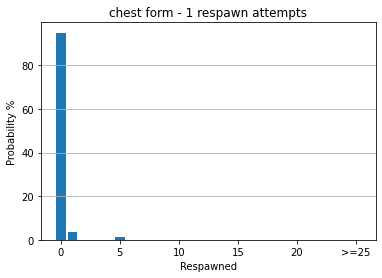

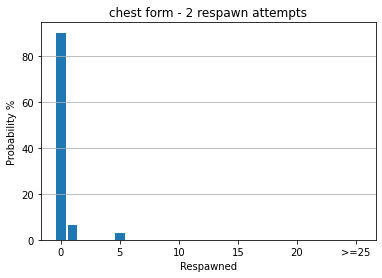

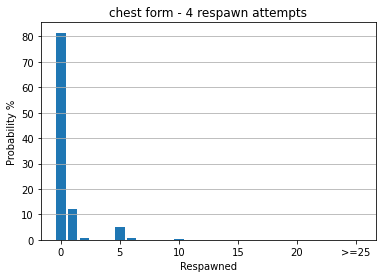

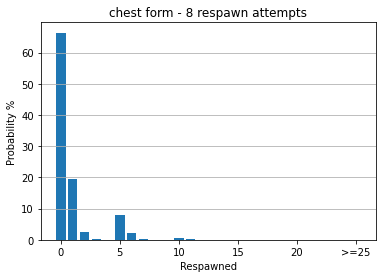

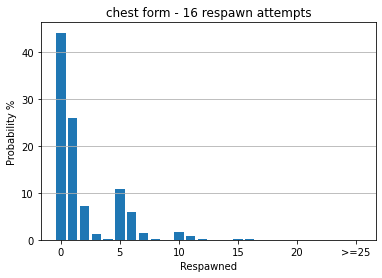

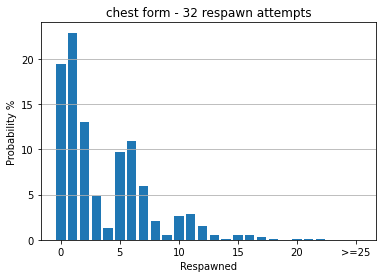

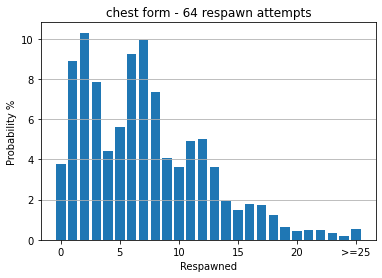

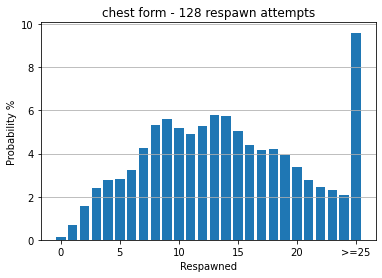

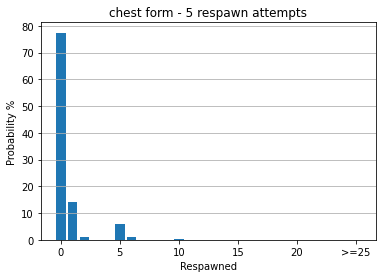

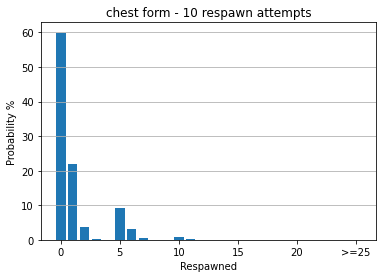

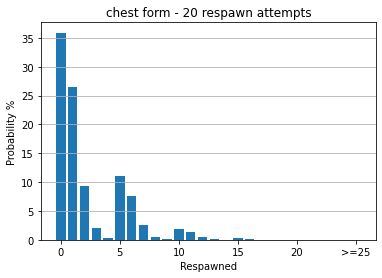

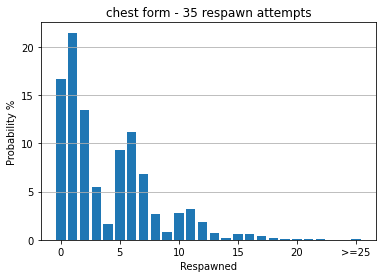

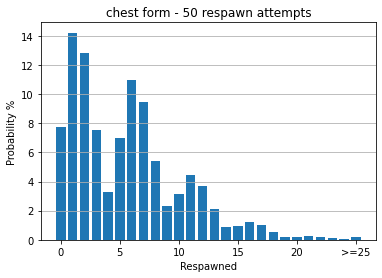

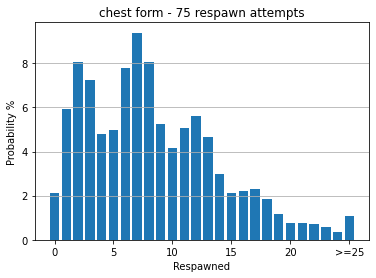

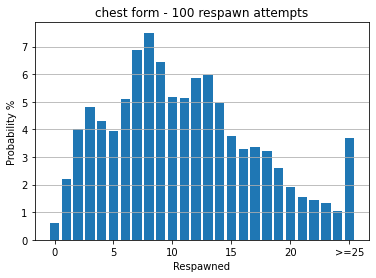

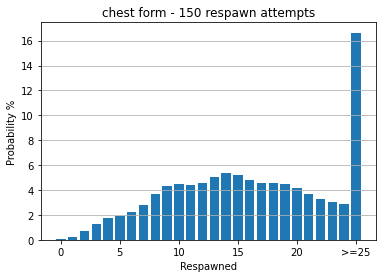

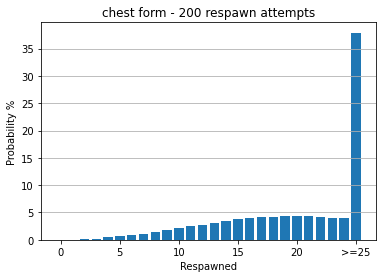

In [7]:
# respawned chest forms in n attempts
box_cap = 25
label = 'chest form'

box_amounts = amounts(box_quantity_num2, box_quantity_rate2, box_cap, 7)
for a in [5,10,20,35,50,75,100,150,200]:
    amounts_extend(box_amounts, a)

for a in box_amounts:
    plot(a[0], a[1], label, [0,5,10,15,20,25], [0,5,10,15,20,'>=25'])

In [8]:
close_figures()

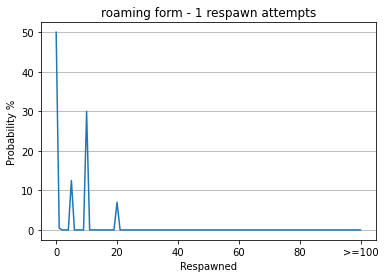

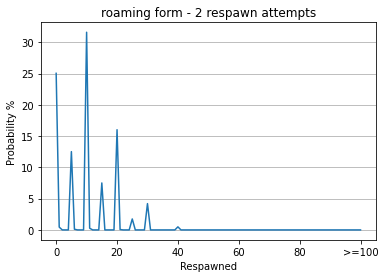

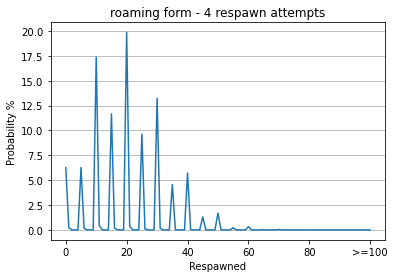

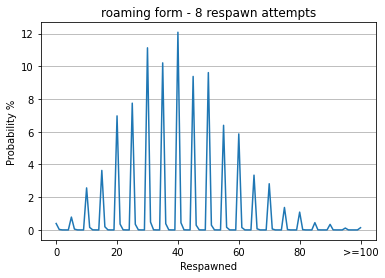

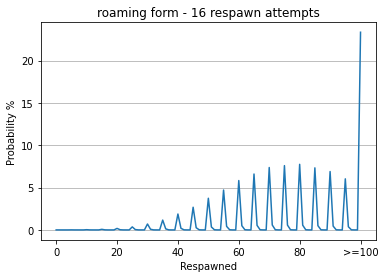

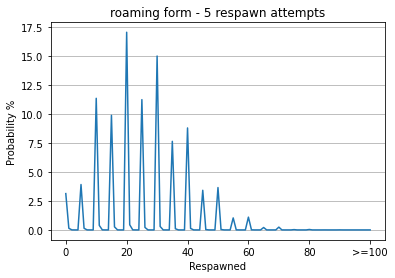

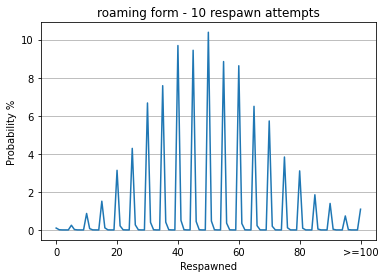

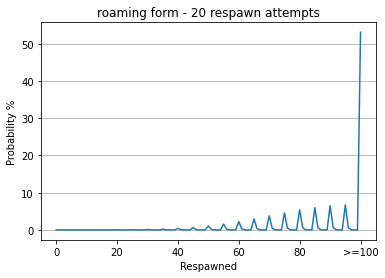

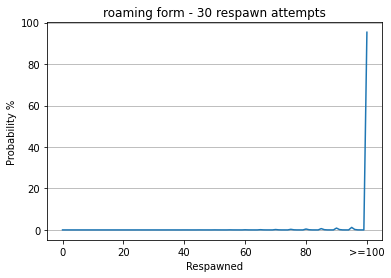

In [9]:
# respawned roaming forms in n attempts
walk_cap = 100
label = 'roaming form'

walk_amounts = amounts(walk_quantity_num2, walk_quantity_rate2, walk_cap, 4)
for a in [5,10,20,30]:
    amounts_extend(walk_amounts, a)

for a in walk_amounts:
    plot(a[0], a[1], label, [0,20,40,60,80,100], [0,20,40,60,80,'>=100'],
        plt.plot)

In [10]:
close_figures()

In [19]:
def plot_coins(attempts, distribution, label, xticks=None, xticks_label=None):
    plt.figure()
    plt.plot(range(len(distribution)), distribution*100)
    plt.xlabel('Collected coins')
    plt.ylabel('Probability %')
    plt.title(f'Coins from {attempts} {label}')
    plt.grid(axis='both')
    plt.xticks(xticks,xticks_label)
    open_figures.append(plt.gcf())

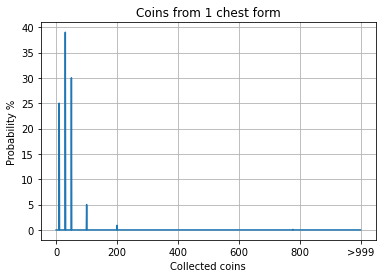

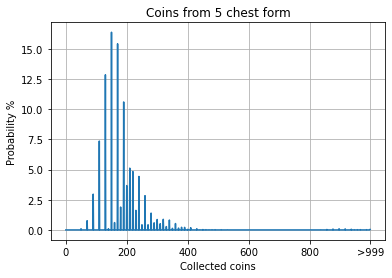

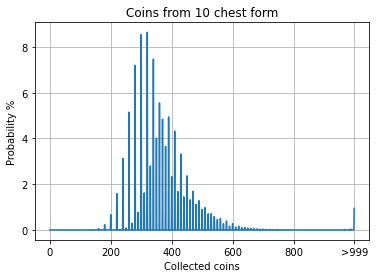

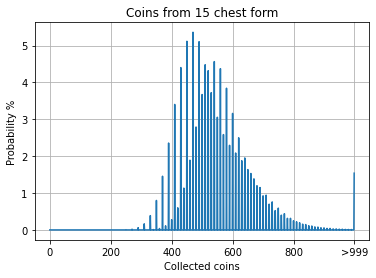

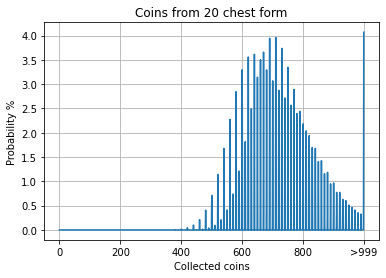

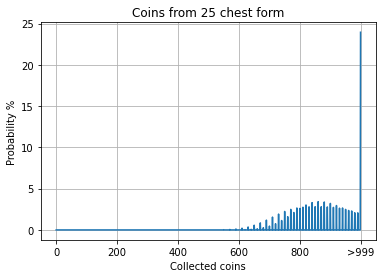

In [20]:
# amount of coins obtained from n chests
box_num_data_rate2 = box_num_data_rate / box_num_data_rate.sum()
coin_cap = 999
label = 'chest form'

coins_from_box = amounts(box_num_data_num, box_num_data_rate2, coin_cap, 4)
for a in [5,10,15,20,25]:
    amounts_extend(coins_from_box, a)

# plot a few interesting cases:
for a in [coins_from_box[0]] + coins_from_box[5:]:
    plot_coins(a[0], a[1], label,
               [0,200,400,600,800,1000],
               [0,200,400,600,800,'>999'])

In [21]:
close_figures()

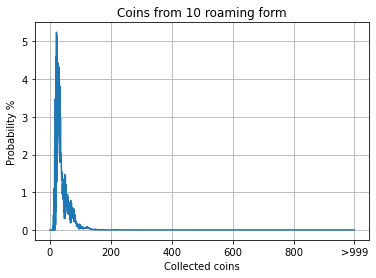

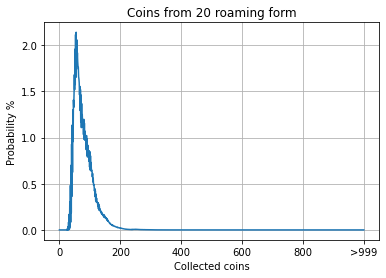

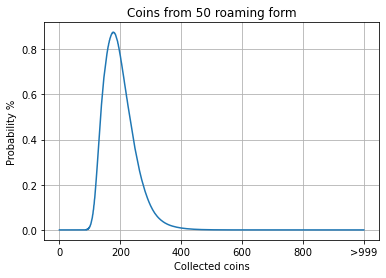

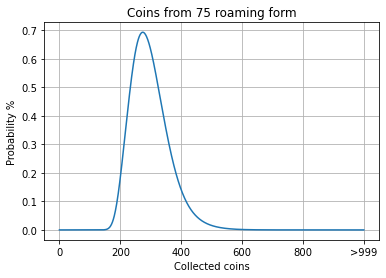

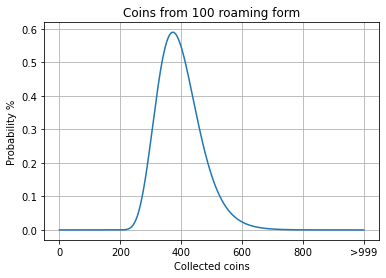

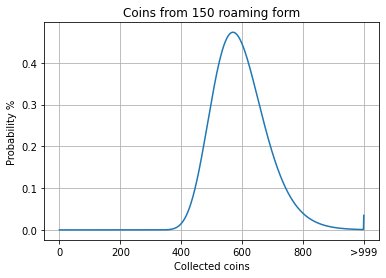

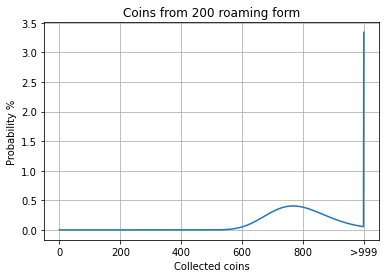

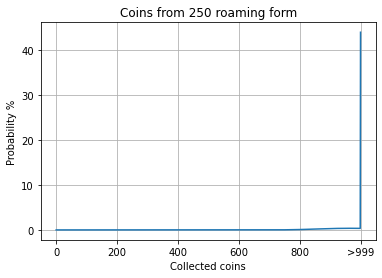

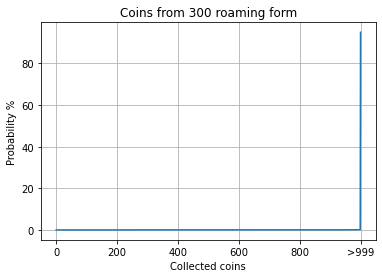

In [22]:
# amount of coins obtained from n roamings
walk_num_data_rate2 = walk_num_data_rate / walk_num_data_rate.sum()
coin_cap = 999
label = 'roaming form'

coins_from_walk = amounts(walk_num_data_num, walk_num_data_rate2, coin_cap, 7)
for a in [10,20,50,75,100,150,200,250,300]:
    amounts_extend(coins_from_walk, a)

# plot a few interesting cases:
for a in coins_from_walk[8:]:
    plot_coins(a[0], a[1], label,
               [0,200,400,600,800,1000],
               [0,200,400,600,800,'>999'])

In [23]:
close_figures()

In [16]:
# coins from chests after nra respawn attepts
# TODO
